# Homework : 4 Machine Learning - 1 (Supervised Methods)

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from utils.oneVsRest import OneVsRest

In [2]:
# Importing The Bean Datasets Train and Test

# Train Dataset
train_data = pd.read_csv("./datasets/Dry_Bean_train.csv")
print("Train Data -> Dry Bean Dataset: ")
print(train_data.head())
print()

Train Data -> Dry Bean Dataset: 
     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   46427    811.657       293.918029       202.246160      1.453269   
1   35857    710.411       261.097189       175.491734      1.487803   
2  171028   1553.271       564.123032       387.736246      1.454914   
3   61736   1006.756       408.994308       193.596049      2.112617   
4  102525   1238.007       478.271451       274.496251      1.742361   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.725612       46974     243.131019  0.683796  0.988355   0.885596   
1      0.740431       36325     213.669255  0.712891  0.987116   0.892821   
2      0.726349      172608     466.647204  0.788962  0.990846   0.890805   
3      0.880876       62339     280.365327  0.827416  0.990327   0.765420   
4      0.818902      103334     361.301653  0.809201  0.992171   0.840608   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4 

In [3]:
# Test Dataset
test_data = pd.read_csv("./datasets/Dry_Bean_test.csv")
print("Test Data -> Dry Bean Dataset: ")
print(test_data.head())
print()

Test Data -> Dry Bean Dataset: 
     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   38542    724.663       273.728756       179.666585      1.523537   
1   76070   1063.592       413.174391       235.346983      1.755597   
2   50253    872.982       354.074847       181.355633      1.952379   
3   44799   1005.548       362.449644       157.986158      2.294186   
4  180028   1630.826       625.624977       371.440425      1.684321   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.754442       38922     221.524713  0.707063  0.990237   0.922299   
1      0.821917       76858     311.215893  0.777446  0.989747   0.845032   
2      0.858869       50859     252.950799  0.641604  0.988085   0.828631   
3      0.900003       46552     238.830187  0.652523  0.962343   0.556766   
4      0.804678      183263     478.767970  0.674611  0.982348   0.850618   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  

## Creating an instance for the OneVsRest() class

In [4]:
ovr = OneVsRest()

## 2] (a) Run the 2-class problems on the Dry Bean Dataset. Store the resulting weight vectors 𝑤𝑘 (will be used in (b)- (d) below)

In [5]:
n_train, X_train, T_train = ovr.generateTrainData(trainData=train_data)

X_train_std = ovr.standardizeTrainData(X_train=X_train)

X_train_augmented = ovr.augmentData(X=X_train_std, n=n_train)
print(f"Shape of Augmented X_train: {X_train_augmented.shape}")


w_vector = ovr.initializeWeights(1)
print(f"Shape of w_vector: {w_vector .shape}")

---------------------------------------------------
TRAIN DATA OF BEAN DATASET: 
  Shape of Input Data: (12249, 17)
  Number of Data Points: 12249
  Number of Input Features: 16
  Number of Target Classes: 7
---------------------------------------------------
Shape of Augmented X_train: (12249, 17)
Shape of w_vector: (17, 7)


In [6]:
optimum_w_vector = ovr.modelTrain_SGD(X_train=X_train_augmented, n_train=n_train, T_train=T_train, w_vector = w_vector, epochs=100, labels = [0, 1, 2, 3, 4, 5, 6], learn_rate=1, printFlag=True)

Epoch #1 of Classifier - 1 --> Cost J(W) is: 1560.0043187198446
Epoch #2 of Classifier - 1 --> Cost J(W) is: 1272.6369203599377
Epoch #3 of Classifier - 1 --> Cost J(W) is: 1461.7155701773804
Epoch #4 of Classifier - 1 --> Cost J(W) is: 1090.1886020358077
Epoch #5 of Classifier - 1 --> Cost J(W) is: 868.7119116743787
Epoch #6 of Classifier - 1 --> Cost J(W) is: 1120.9473216508525
Epoch #7 of Classifier - 1 --> Cost J(W) is: 2249.0916480469405
Epoch #8 of Classifier - 1 --> Cost J(W) is: 1242.469761489782
Epoch #9 of Classifier - 1 --> Cost J(W) is: 903.4142717613272
Epoch #10 of Classifier - 1 --> Cost J(W) is: 970.8006130199673
Epoch #11 of Classifier - 1 --> Cost J(W) is: 1759.988363281378
Epoch #12 of Classifier - 1 --> Cost J(W) is: 1432.7058265735584
Epoch #13 of Classifier - 1 --> Cost J(W) is: 1109.6609753258542
Epoch #14 of Classifier - 1 --> Cost J(W) is: 1959.3102697351744
Epoch #15 of Classifier - 1 --> Cost J(W) is: 1796.5565187095353
Epoch #16 of Classifier - 1 --> Cost J(

8.433341497265083

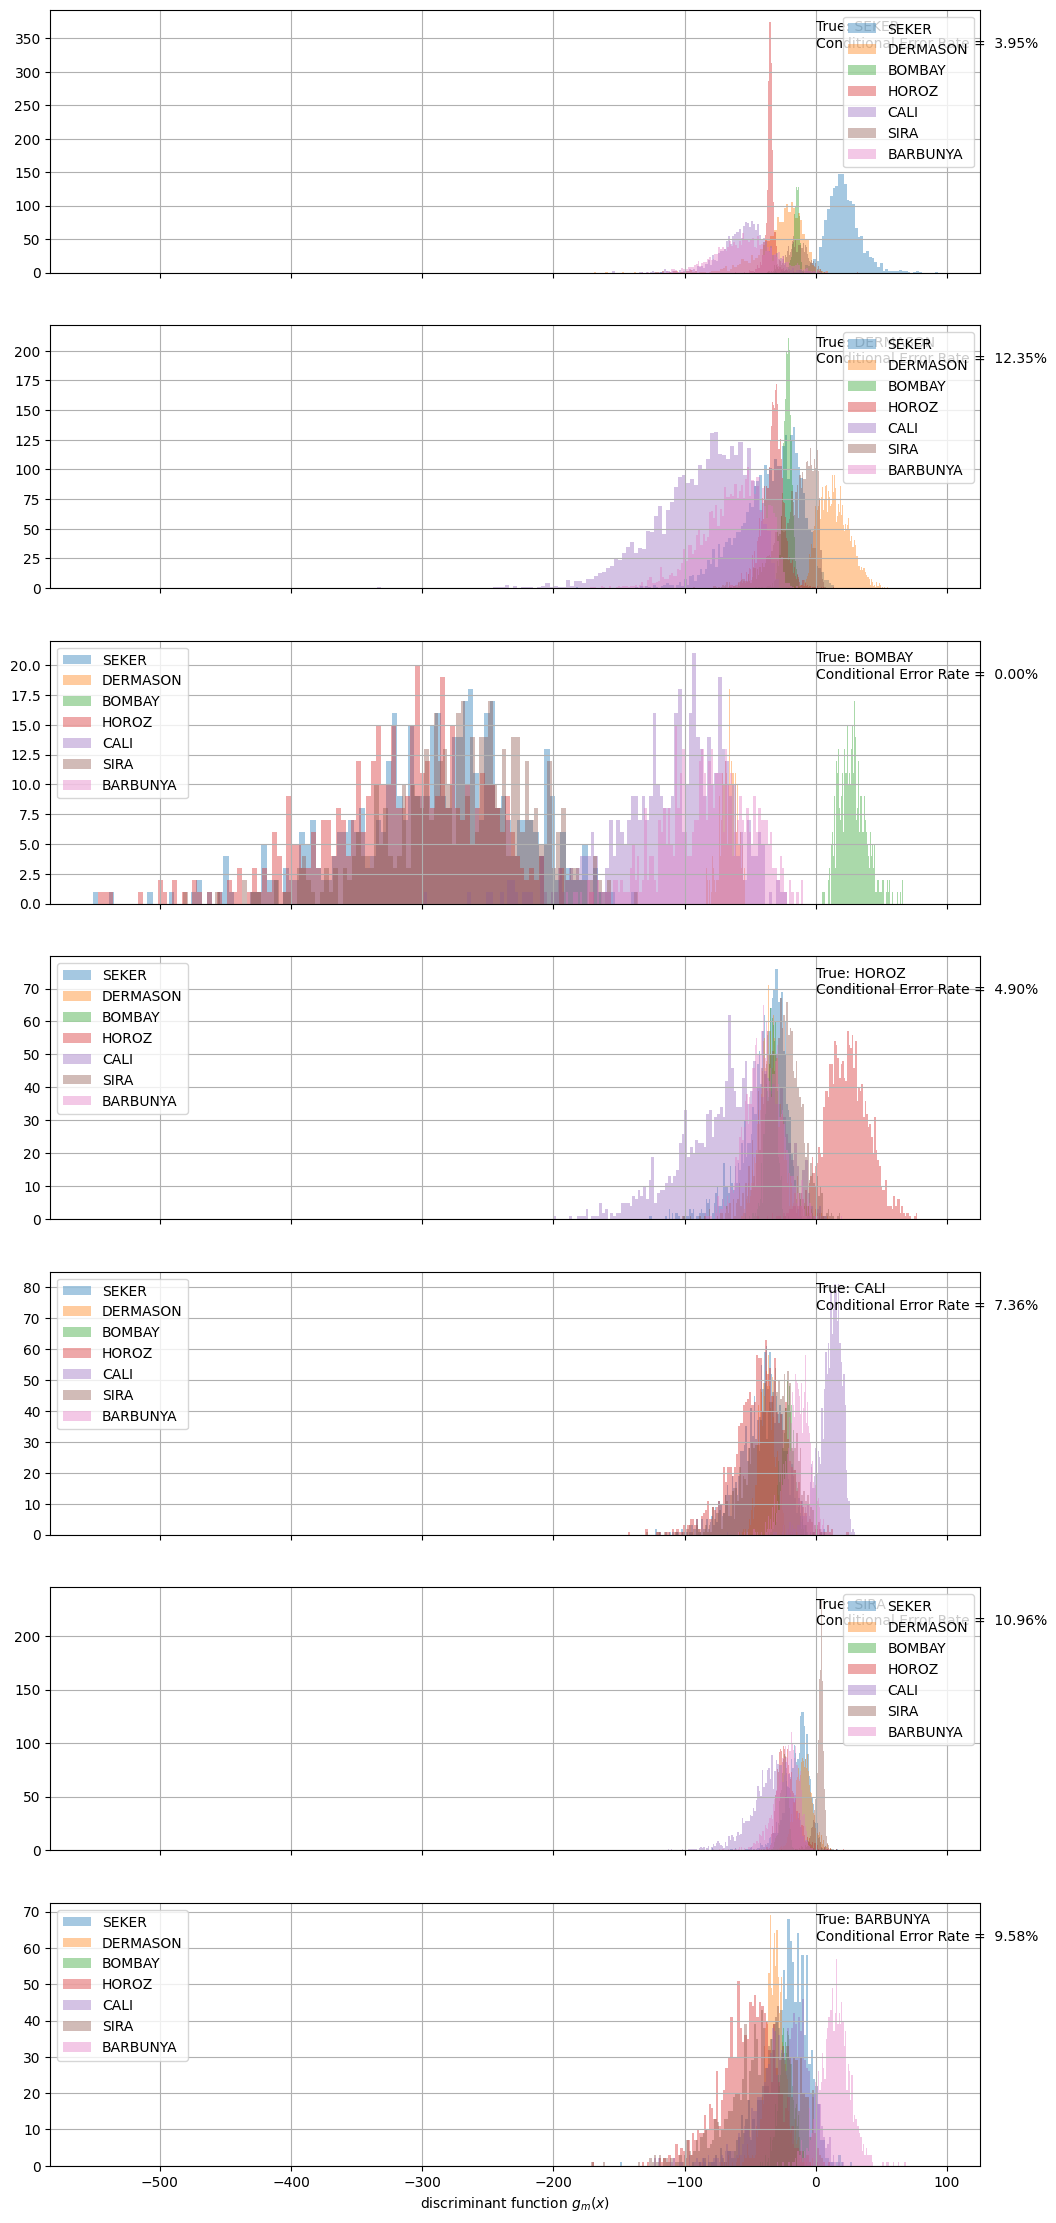

In [7]:
ovr.plot_multiclass_histograms(X_aug = X_train_augmented, W = optimum_w_vector, 
                               y=T_train, fname = "Histogram Dry Bean Dataset", norm_W=False, 
                               scale=1, class_names=['SEKER','DERMASON','BOMBAY','HOROZ','CALI','SIRA','BARBUNYA'])

In [8]:
optimum_w_vector.shape

(17, 7)

## 2] (a) ii] Calculating Accuracy of Training Data of the Dry Bean Dataset.

In [9]:
print("Accuracy of the Training Set!")
for i in range(7):
    print("--------------------------------------------------------------------------------")
    print(f"Class {i} Vs Rest !")
    Y_hat_train = ovr.predict(optimum_w_vector=optimum_w_vector[:, i], X_train = X_train_augmented)
    T_train_changed = ovr.changeLabels(T_train, i)
    acc = ovr.calculateAccuracy(T=T_train_changed, Y_hat=Y_hat_train, n=n_train)
    print(f"Accuracy on the Training Set for Class {i} Vs. Rest is {acc}%")
    print("---------------------------------------------------------------------------------")
    print()


Accuracy of the Training Set!
--------------------------------------------------------------------------------
Class 0 Vs Rest !
Accuracy on the Training Set for Class 0 Vs. Rest is 97.7549187688791%
---------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Class 1 Vs Rest !
Accuracy on the Training Set for Class 1 Vs. Rest is 95.30573924401992%
---------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Class 2 Vs Rest !
Accuracy on the Training Set for Class 2 Vs. Rest is 100.0%
---------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Class 3 Vs Rest !
Accuracy on the Training Set for Class 3 Vs. Rest is 98.48150869458732%
--------------------------------------------------

## 2] (a) ii] Calculating the Tes Accuracy on the Test data of Dry Bean Dataset.

In [10]:
n_test, X_test, T_test = ovr.generateTestData(testData=test_data, printFlag=True) 
X_test_std = ovr.standardizeTestData(X_test=X_test)

X_test_augmented = ovr.augmentData(X=X_test_std, n=n_test)
print(f"Shape of Augmented X_test: {X_test_augmented.shape}")

---------------------------------------------------
TEST DATA OF BEAN DATASET: 
  Shape of Input Data: (1362, 17)
  Number of Data Points: 1362
  Number of Input Features: 16
  Number of Target Classes: 7
---------------------------------------------------
Shape of Augmented X_test: (1362, 17)


In [11]:
print("Accuracy of the Test Set!")
for i in range(7):
    print("--------------------------------------------------------------------------------")
    print(f"Class {i} Vs Rest !")
    Y_hat_test = ovr.predict(optimum_w_vector=optimum_w_vector[:, i], X_train = X_test_augmented)
    T_test_changed = ovr.changeLabels(T_test, i)
    acc = ovr.calculateAccuracy(T=T_test_changed, Y_hat=Y_hat_test, n=n_test)
    print(f"Accuracy on the Test Set for Class {i} Vs. Rest is {acc}%")
    print("---------------------------------------------------------------------------------")
    print()

Accuracy of the Test Set!
--------------------------------------------------------------------------------
Class 0 Vs Rest !
Accuracy on the Test Set for Class 0 Vs. Rest is 98.01762114537445%
---------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Class 1 Vs Rest !
Accuracy on the Test Set for Class 1 Vs. Rest is 93.90602055800294%
---------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Class 2 Vs Rest !
Accuracy on the Test Set for Class 2 Vs. Rest is 100.0%
---------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Class 3 Vs Rest !
Accuracy on the Test Set for Class 3 Vs. Rest is 98.60499265785609%
---------------------------------------------------------------------

## 2] (b)-(d) Code and run each combining method. Tip: use the stored weight vectors from (a) to apply rules (i), (ii), (iii).For each method, report the following performance measures separately on the training Set 

In [12]:
ovr.predictionTechnique1(X_train_augmented, T_train, optimum_w_vector, n_train)

(86.1947914115438, 5.159604865703322, 8.645603722752877)

In [13]:
ovr.predictionTechnique2(X_train_augmented, T_train, optimum_w_vector, n_train)

(91.56665850273492, 8.433341497265083, 0.0)

## Using Prediction Method -> 1

In [14]:
classificationAccTrain_1, errorRateTrain_1, unclassifiedRateTrain_1 = ovr.predictionTechnique1(X_train_augmented, T_train, optimum_w_vector, n_train)
print("--------------------------------------------------------------------------------------------------------")
print(f"Classification Accuracy on Training Data: {classificationAccTrain_1}")
print(f"Error rate on Training Data: {errorRateTrain_1}")
print(f"Unclassified Rate on Training Data: {unclassifiedRateTrain_1}")
print("--------------------------------------------------------------------------------------------------------")

classificationAccTest_1, errorRateTest_1, unclassifiedRateTest_1 = ovr.predictionTechnique1(X_test_augmented, T_test, optimum_w_vector, n_test)
print("--------------------------------------------------------------------------------------------------------")
print(f"Classification Accuracy on Test Data: {classificationAccTest_1}")
print(f"Error rate on Test Data: {errorRateTest_1}")
print(f"Unclassified Rate on Test Data: {unclassifiedRateTest_1}")
print("--------------------------------------------------------------------------------------------------------")


--------------------------------------------------------------------------------------------------------
Classification Accuracy on Training Data: 86.1947914115438
Error rate on Training Data: 5.159604865703322
Unclassified Rate on Training Data: 8.645603722752877
--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------
Classification Accuracy on Training Data: 85.5359765051395
Error rate on Training Data: 6.020558002936858
Unclassified Rate on Training Data: 8.443465491923643
--------------------------------------------------------------------------------------------------------


## Using Prediction Method -> 2

In [15]:
classificationAccTrain_2, errorRateTrain_2, unclassifiedRateTrain_2 = ovr.predictionTechnique2(X_train_augmented, T_train, optimum_w_vector, n_train)
print("--------------------------------------------------------------------------------------------------------")
print(f"Classification Accuracy on Training Data: {classificationAccTrain_2}")
print(f"Error rate on Training Data: {errorRateTrain_2}")
print(f"Unclassified Rate on Training Data: {unclassifiedRateTrain_2}")
print("--------------------------------------------------------------------------------------------------------")

classificationAccTest_2, errorRateTest_2, unclassifiedRateTest_2 = ovr.predictionTechnique2(X_test_augmented, T_test, optimum_w_vector, n_test)
print("--------------------------------------------------------------------------------------------------------")
print(f"Classification Accuracy on Test Data: {classificationAccTest_2}")
print(f"Error rate on Test Data: {errorRateTest_2}")
print(f"Unclassified Rate on Test Data: {unclassifiedRateTest_2}")
print("--------------------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------------------
Classification Accuracy on Training Data: 91.56665850273492
Error rate on Training Data: 8.433341497265083
Unclassified Rate on Training Data: 0.0
--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------
Classification Accuracy on Training Data: 90.45521292217327
Error rate on Training Data: 9.544787077826726
Unclassified Rate on Training Data: 0.0
--------------------------------------------------------------------------------------------------------


## Using Prediction Method --> 3

In [16]:
classificationAccTrain_3, errorRateTrain_3, unclassifiedRateTrain_3 = ovr.predictionTechnique3(X_train_augmented, T_train, optimum_w_vector, n_train)
print("--------------------------------------------------------------------------------------------------------")
print(f"Classification Accuracy on Training Data: {classificationAccTrain_3}")
print(f"Error rate on Training Data: {errorRateTrain_3}")
print(f"Unclassified Rate on Training Data: {unclassifiedRateTrain_3}")
print("--------------------------------------------------------------------------------------------------------")

classificationAccTest_3, errorRateTest_3, unclassifiedRateTest_3 = ovr.predictionTechnique3(X_test_augmented, T_test, optimum_w_vector, n_test)
print("--------------------------------------------------------------------------------------------------------")
print(f"Classification Accuracy on Test Data: {classificationAccTest_3}")
print(f"Error rate on Test Data: {errorRateTest_3}")
print(f"Unclassified Rate on Test Data: {unclassifiedRateTest_3}")
print("--------------------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------------------
Classification Accuracy on Training Data: 91.60747816148258
Error rate on Training Data: 8.39252183851743
Unclassified Rate on Training Data: 0.0
--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------
Classification Accuracy on Training Data: 90.30837004405286
Error rate on Training Data: 9.691629955947137
Unclassified Rate on Training Data: 0.0
--------------------------------------------------------------------------------------------------------


## 2] (e) Compare the results of (b)-(d). Try to explain similarities and differences you observe.

### We can clearly see that when we use the method-1 for prediction, the unclassified rate is <strong> 8.64% on Training Data </strong> and <strong> 8.45% on the Test Data </strong>. This is because when we use the One Vs Rest Decision rule, we might definitely get the indeterminate region which cannot be classified as a particular class. But its evident that the Accuracy is less compared to Method - 2 and Method - 3 but the Misclassification Rate is around 5 - 6 % on the Training and Test data. This is because when we cannot classsify a data point we just don't classify it rather than classifying it as some class.

### We can also notice that when we use the Method - 2 and Method - 3 for prediction, the unclassified rate is literally 0%. This is because we use the decision rule as argmax(g_x). Hence, even if its wrong, we get some class as output but we cannot be sure that its 100% correct. There is a boost in accuracy when compared to the Method - 1. But Misclasssification rate is around 8 - 9% which is higher than method - 1.

### The results of Method - 3 are almost similar to that of Method - 2 because here also we are using the argmax(). 